# Chapter 19: Social Network Analysis

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

Make sure DMBA package is available

In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path

import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import dmba

%matplotlib inline


no display found. Using non-interactive Agg backend


## Figure 19.1 
 

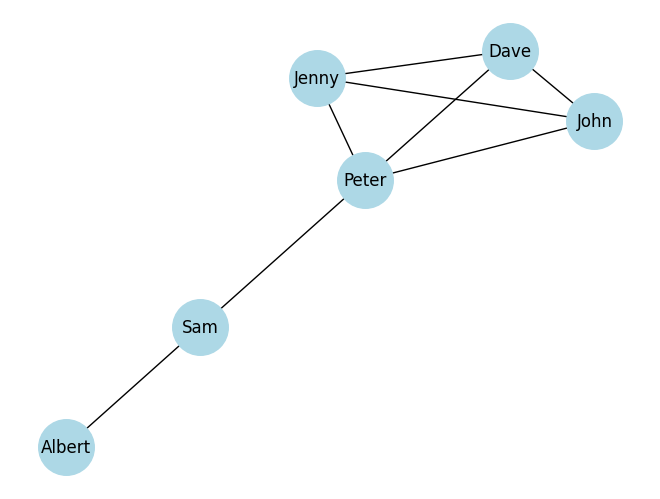

In [3]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([
    ("Dave", "Jenny"), ("Peter", "Jenny"), ("John", "Jenny"),
    ("Dave", "Peter"), ("Dave", "John"), ("Peter", "Sam"),
    ("Sam", "Albert"), ("Peter", "John")
], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

## Figure 19.2

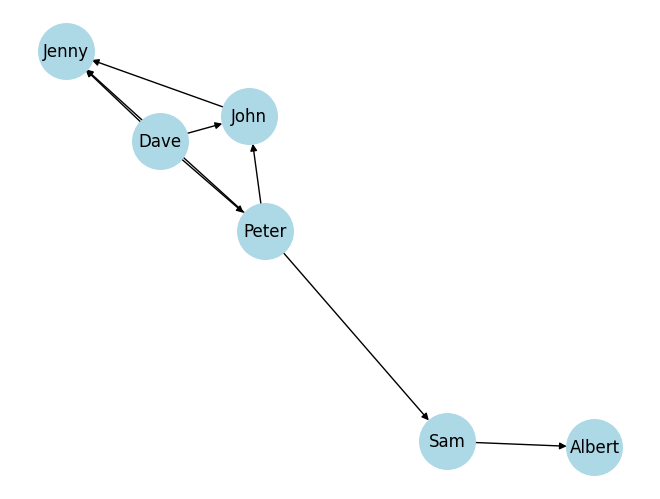

In [4]:
# generate and plot graph
# use nx.DiGraph to create a directed graph
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

## Figure 19.4 DRUG LAUNDRY NETWORK IN SAN ANTONIO, TX

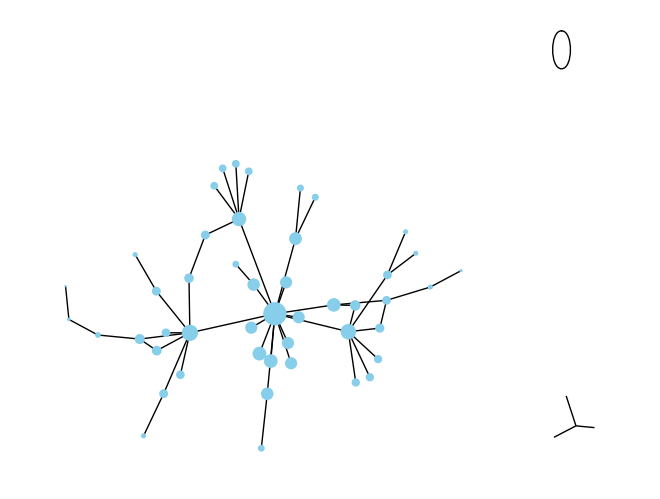

In [5]:
drug_df = dmba.load_data('drug.csv')

G = nx.from_pandas_edgelist(drug_df, 'Entity', 'Related Entity')

centrality = nx.eigenvector_centrality(G)

nx.draw(G, with_labels=False, node_color='skyblue', node_size=[400*centrality[n] for n in G.nodes()])
plt.show()

## Figure 19.5

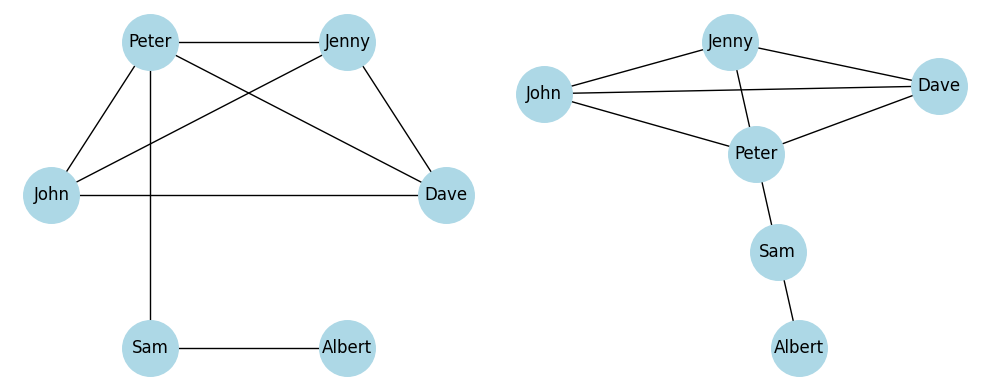

In [6]:
G = nx.from_pandas_edgelist(df, 'from', 'to')

plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(121)
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.subplot(122)
nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.tight_layout()
plt.show()

## Table 19.2 Adjacency matrix

In [7]:
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
print(nx.to_numpy_array(G))

[[0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]


[('Dave', 3), ('Jenny', 3), ('Peter', 4), ('John', 3), ('Sam', 2), ('Albert', 1)]
Centrality: 
{'Dave': 0.625, 'Jenny': 0.625, 'Peter': 0.8333333333333334, 'John': 0.625, 'Sam': 0.625, 'Albert': 0.4166666666666667}
Betweenness: 
{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 6.0, 'John': 0.0, 'Sam': 4.0, 'Albert': 0.0}
{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 0.6000000000000001, 'John': 0.0, 'Sam': 0.4, 'Albert': 0.0}
Eigenvector centrality: 
{'Dave': 0.47246979363344, 'Jenny': 0.47246979363344, 'Peter': 0.528716197637421, 'John': 0.47246979363344, 'Sam': 0.2105222549863287, 'Albert': 0.08035200571997278}


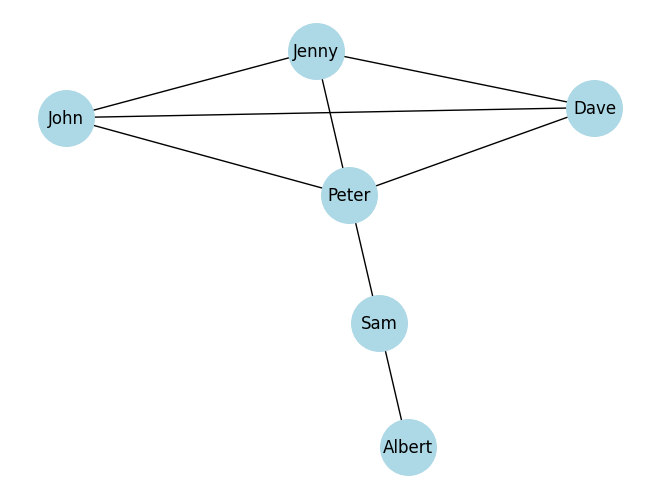

In [8]:
G = nx.from_pandas_edgelist(df, 'from', 'to')
print(G.degree())
print('Centrality: ')
print(nx.closeness_centrality(G))

print('Betweenness: ')
print(nx.betweenness_centrality(G, normalized=False))
print(nx.betweenness_centrality(G))

print('Eigenvector centrality: ')
print(nx.eigenvector_centrality(G, tol=1e-2))
v = nx.eigenvector_centrality(G, tol=1e-2).values()

nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600)

In [9]:
print(nx.betweenness_centrality(G))
print(nx.current_flow_betweenness_centrality(G))

{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 0.6000000000000001, 'John': 0.0, 'Sam': 0.4, 'Albert': 0.0}
{'Dave': 0.175, 'Jenny': 0.175, 'Peter': 0.675, 'John': 0.175, 'Sam': 0.4, 'Albert': 0.0}


['Dave', 'Jenny', 'Peter', 'John', 'Sam', 'Albert']


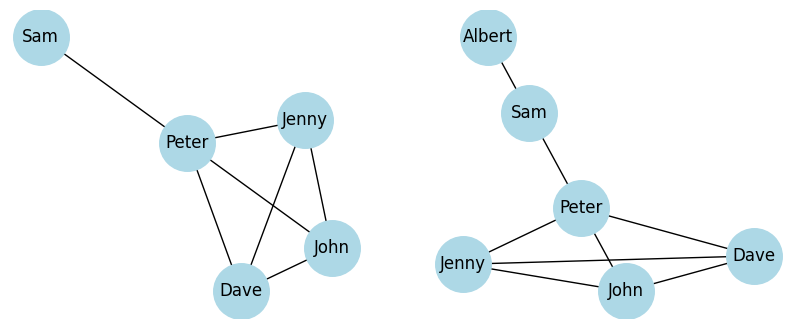

In [10]:
print(G.nodes)

plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(121)
G_ego = nx.ego_graph(G, 'Peter')
nx.draw(G_ego, with_labels=True, node_color='lightblue', node_size=1600)
plt.subplot(122)
G_ego = nx.ego_graph(G, 'Peter', radius=2)
nx.draw(G_ego, with_labels=True, node_color='lightblue', node_size=1600)

## Table 19.5

In [11]:
degreeCount = collections.Counter(d for node, d in G.degree())
degreeDistribution = [0] * (1 + max(degreeCount))
for degree, count in degreeCount.items():
    degreeDistribution[degree] = count
degreeDistribution

[0, 1, 1, 3, 1]

In [12]:
degreeCount = collections.Counter(d for node, d in G.degree())
degreeCount

Counter({3: 3, 4: 1, 2: 1, 1: 1})

In [13]:
nx.density(G)

0.5333333333333333

In [14]:
[d / sum(degreeDistribution) for d in degreeDistribution]  # normalized

[0.0, 0.16666666666666666, 0.16666666666666666, 0.5, 0.16666666666666666]

# Table 19.11

In [15]:
import os

credentials = {}  
credentials['CONSUMER_KEY'] = os.environ.get('TWITTER_CONSUMER_KEY', None)
credentials['CONSUMER_SECRET'] = os.environ.get('TWITTER_CONSUMER_SECRET', None)

if not (credentials['CONSUMER_KEY'] is None and credentials['CONSUMER_SECRET'] is None):
    from twython import Twython  
    python_tweets = Twython(credentials['CONSUMER_KEY'], credentials['CONSUMER_SECRET'])

    # Create our query
    query = {'q': 'text mining', 'result_type': 'recent',
            'count': 25, 'lang': 'en'}

    recentTweets = python_tweets.search(**query)
    for tweet in recentTweets['statuses'][:2]:
        print(tweet['text'])

E.g.

```
RT @data_nerd: Text Mining 101: What it Is and How it Works - DZone Big Data https://t.co/zLyzX1NHJS
RT @sciencedirect: What if you could access only the information you needed instead of having to sift through all the information that is p…
```

## Table 19.2

In [16]:
token = '<access token>'
if token != '<access token>':  # skip execution if token is not available
    import facebook
    graph = facebook.GraphAPI(access_token=token)
    results = graph.request('/dataminingbook/posts?fields=likes.summary(true),message,created_time&limit=10')
    pd.DataFrame([
        {
            'created_time': d.get('created_time', ''),
            'message': d.get('message', ''),
            'likes': d.get('likes', {}).get('summary', {}).get('total_count', 0),
        } for d in results['data']])